In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
import pandas as pd
df=pd.read_csv('D:/Python file/Practice Project Datasets/Week2/happiness_score.csv')  #Path location of the dataset
df.head()  #Checking out the top 5 rows of the dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape    #Checking the dimensions of the dataset

(158, 12)

In [4]:
df.columns   #Checking out the columns of the dataset

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Dataset Description 

-> The World Happiness Report is a landmark survey of the state of global happiness and the score is known as happiness score.      It is calculated all over the globe.

->The reports review the state of happiness in the world today and show how the new science of happiness explains personal and     national variations in happiness.

->The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life         evaluation question asked in the poll.

->The columns following the happiness score estimate the extent to which each of six factors – economic production, social         support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in       each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages     for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some     countries rank higher than others.

->There are totally 158 rows and 12 columns namely:

1.Country

2.Region

3.Happiness Rank

4.Happiness Score

5.Standard Error

6.Economy (GDP per Capita)

7.Family

8.Health (Life Expectancy)

9.Freedom

10.Trust (Government Corruption)

11.Generosity

12.Dystopia Residual

->Our aim in this project is to predict the happiness score with the help of the given data and since the values are continuous   data, we need to use regression analysis.

In [5]:
df.info()    #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

There are two columns having categorical data and we can change it by using Encoding technique

In [6]:
df.isnull().sum()   #Checking for null values in the dataset

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no missing values in the dataset 

# Exploratory Data Analysis

In [7]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

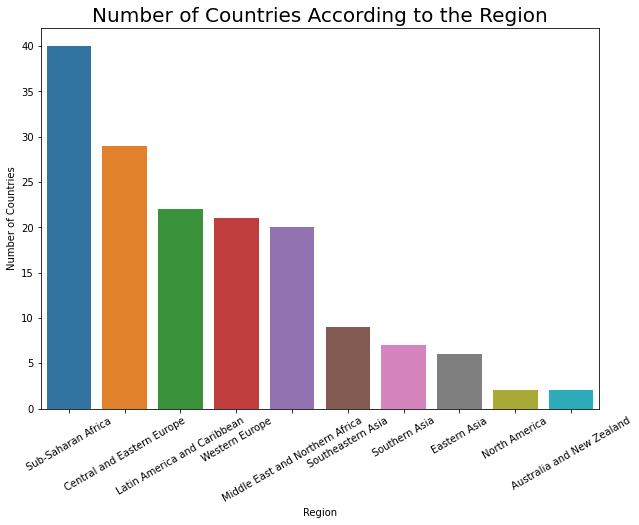

In [8]:
#For checking the number of countries according to region using bar plot
data=df.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=data.index,y=data.values)
plt.xlabel('Region')
plt.xticks(rotation = 30)
plt.ylabel('Number of Countries')
plt.title('Number of Countries According to the Region', fontsize = 20)
plt.show()

Sub-Saharan Africa region has more countries whereas North America, Austraila and New Zealand have the lowest countries

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

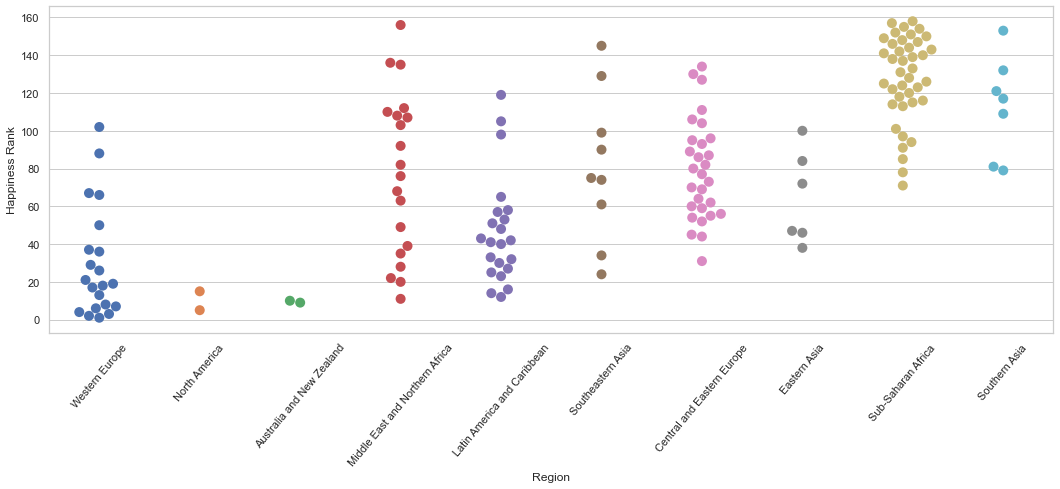

In [9]:
#Checking happiness rank according to region using swarm plot
sns.set(style='whitegrid')
plt.figure(figsize=(18,6))
sns.swarmplot(x="Region", y="Happiness Rank", data=df,size=10)
plt.xticks(rotation=50)

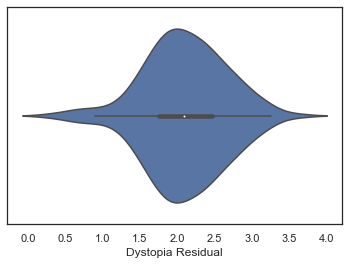

In [10]:
#Checking the distribution of Dystopia Residual using violin plot
sns.set_style('white')
sns.violinplot(x='Dystopia Residual',data=df)

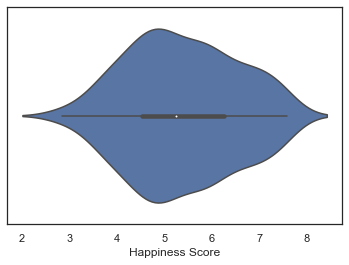

In [11]:
#Checking the distribution of Happiness Score
sns.violinplot(x='Happiness Score',data=df)

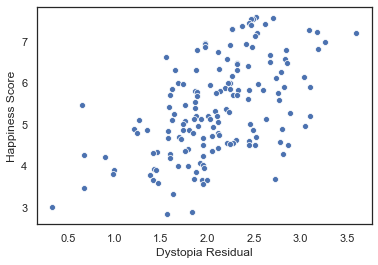

In [12]:
#Checking relationship of 2 columns using scatter plot
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df)

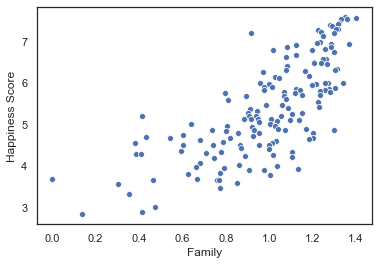

In [13]:
sns.scatterplot(x='Family',y='Happiness Score',data=df)

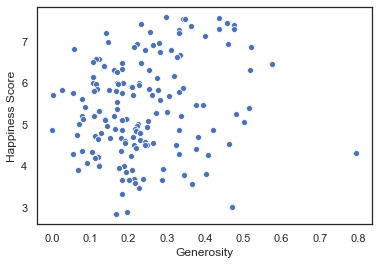

In [14]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)

The relationship between the Happiness Score and other columns are not in linear due to the presence of skewness

# Multivariate Analysis

In [15]:
df.describe()    #Statistical summary of the dataset

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations:

1.There is not much difference between the mean and median so that we can estimate that there are no outliers present.

2.Min value of most of the columns are having 0 as the value

In [16]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


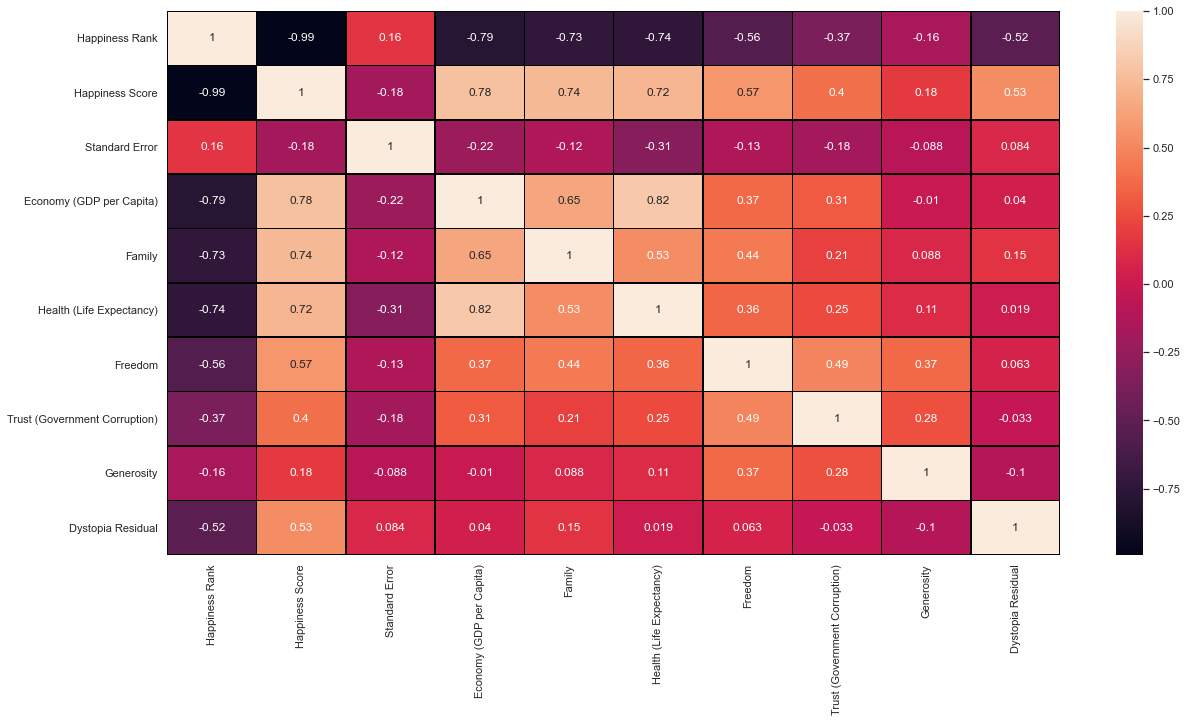

In [17]:
#Plotting heatmap to understand the visualization of correlation
plt.figure(figsize=(20,10))
sns.heatmap(corr,linewidth=0.5,linecolor='black',annot=True)
plt.show()

Observations:

1.Most of the columns are positively correlated

2.Happiness rank is the column which is highly negative correlated and highest value is nearly -99%

3.Highly positive correlated column is Happiness Score and maximum positive value is 78% with Economy column

4.Positively correlated columns have high impact with the target variable, whereas negatively correlated column have zero or less impact with the target variable

# Converting Categorical data

As there are few categorical columns in the dataset, we can convert it by using Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'].astype(str))
df['Region']=le.fit_transform(df['Region'].astype(str))

In [19]:
#Checking the datatype of the columns after encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

In [20]:
#Checking out the dataset after encoding
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


After LabelEncoding we can see that 

# Checking skewness 

In [21]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Columns like Standard Error, Family, Trust and Generosity are having large skewness

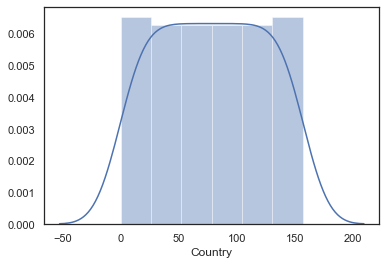

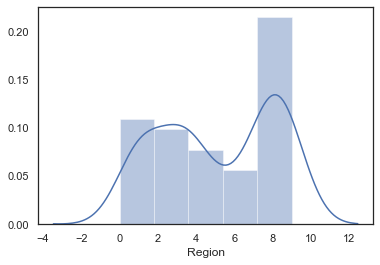

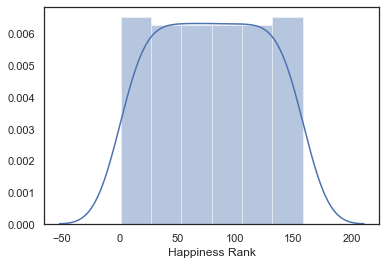

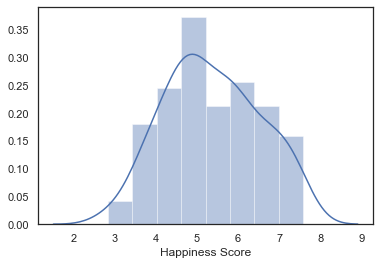

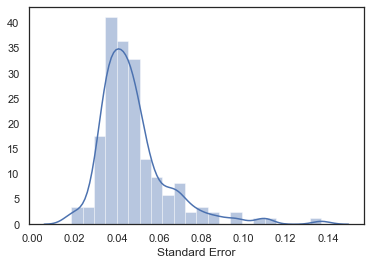

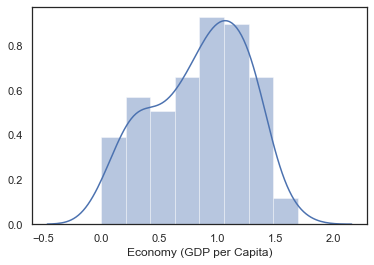

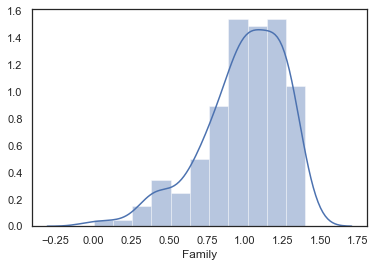

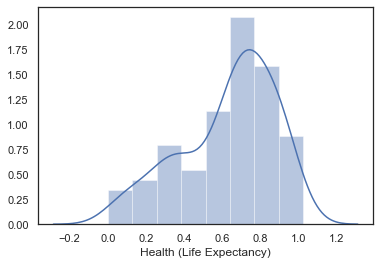

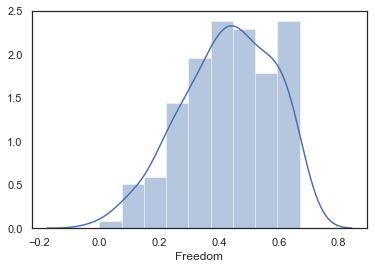

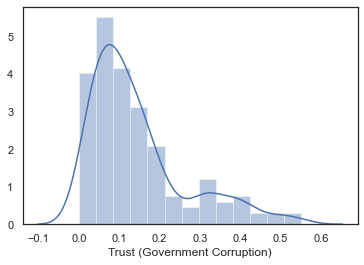

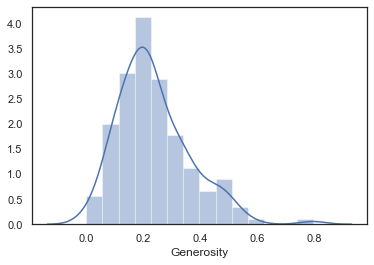

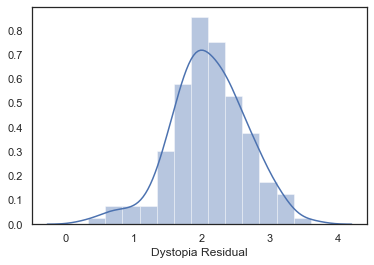

In [22]:
#Checking distribution of data using distribution plot
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

Nearly most of the columns are not normally distributed and it is due to the presence of outliers and we need to handle them

# Checking outliers

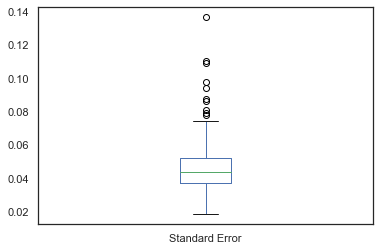

In [23]:
#Plotting boxplot for checking outliers
df['Standard Error'].plot.box()

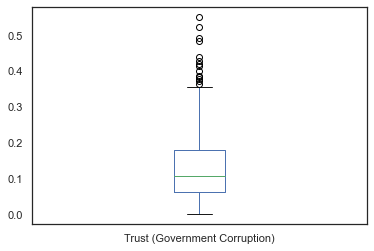

In [24]:
df['Trust (Government Corruption)'].plot.box()

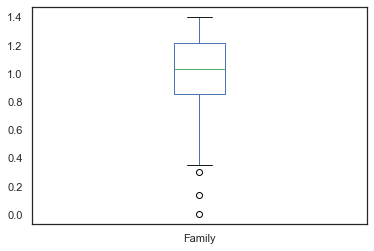

In [25]:
df['Family'].plot.box()

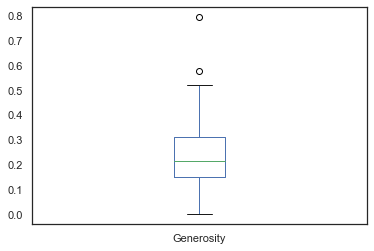

In [26]:
df['Generosity'].plot.box()

There are more outliers present and we can handle them by using z-score

# Handling outliers using z-score

In [27]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

In [28]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [29]:
df.shape   #Original dataset dimensions

(158, 12)

In [30]:
df_new.shape   #New dataset dimensions

(149, 12)

We can see that 9 rows had outliers and it has been removed from the dataset using z-score method

# Percentage loss of data after removing outliers

In [31]:
percentage_loss=((9)/158)*100
print(percentage_loss)

5.69620253164557


Nearly 5 percent of data has been lost from the data due to removal of outliers

# Preparing dataset for model training

Splitting x(Independent variables) and y(Target variable/Dependent variables)

In [32]:
x=df_new.drop('Happiness Score',axis=1)   #Independent variables
y=df_new['Happiness Score']    #Dependent or Target Variable

In [33]:
#Checking x data
x.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [34]:
#Checking y data after splitting
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

# Removing skewness using power transform

In [35]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #Transforming x data

# Scaling the model

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [36]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.81762512,
         0.65957854,  0.75525527],
       [-0.30048669,  1.23451354, -1.99584442, ...,  0.32967609,
         1.56260401,  1.11116834],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.95339954,
         0.97722591,  0.70649452],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -0.19284338,
         1.13425805, -0.32711524],
       [-1.50728158,  0.95527966,  1.56626337, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-1.24683102,  0.95527966,  1.60111233, ..., -0.14727362,
        -0.17248609, -0.55359235]])

After scaling the data we can see that all values are in a particular range

# Building the model

In [37]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [38]:
#Finding the best random state and accuracy
best_rstate=0
accuracy=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 28 ,the model performs well
Training r2_score is:  99.61576961229217
Testing r2_score is:  99.62182246172043
At random state 108 ,the model performs well
Training r2_score is:  99.59800035150633
Testing r2_score is:  99.59893551845087
At random state 215 ,the model performs well
Training r2_score is:  99.5993622804649
Testing r2_score is:  99.59961832982496
At random state 347 ,the model performs well
Training r2_score is:  99.60067264525637
Testing r2_score is:  99.60342288839084
At random state 470 ,the model performs well
Training r2_score is:  99.61229499800436
Testing r2_score is:  99.61212600723344
At random state 525 ,the model performs well
Training r2_score is:  99.61309527135798
Testing r2_score is:  99.60832488084264
At random state 722 ,the model performs well
Training r2_score is:  99.61562058870301
Testing r2_score is:  99.61559271012787
At random state 753 ,the model performs well
Training r2_score is:  99.6109324440251
Testing r2_score is:  99.6063312910

We can see that at random state=935, it is giving excellent training and testing r2_scores so that we can create the train_test_split using this random state

In [39]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=935,test_size=.20)

# Finding the best model

In [40]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression 

In [41]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)

Accuracy:  99.624349590118
Cross Validation score:  99.33729445360568
Difference:  0.2870551365123264


In [42]:
print('For Linear Regression: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Linear Regression: 

Mean Squared Error:  0.00458936131055676
Root Mean Squared Error:  0.06774482497251551


# Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)

Accuracy:  99.8859869679242
Cross Validation score:  99.28096007495633
Difference:  0.6050268929678637


In [44]:
print('For Random Forest Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Random Forest Regressor: 

Mean Squared Error:  0.001392909429999969
Root Mean Squared Error:  0.03732170186366062


# Support Vector Regressor

In [45]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SVR(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)

Accuracy:  93.98952735406787
Cross Validation score:  93.73438829962068
Difference:  0.2551390544471954


In [46]:
print('For Support Vector Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Support Vector Regressor: 

Mean Squared Error:  0.07343058837088841
Root Mean Squared Error:  0.27098078967131306


# Gradient Boosting Regressor

In [47]:
#lets apply regression to datasets
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y): #Def is used such that we can call it later
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('Accuracy correponding to best random state',final_r_state,'is',max_r_score*100)
    return final_r_state

In [48]:
# for getting best set of parameters, we will use GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,100]} 
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [49]:
#Using the best learning rate and n_estimator value for finding r2_score
gbr=GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 100)
r_state=maxr2_score(gbr,x,y)


Accuracy correponding to best random state 99 is 99.94027662376638


It is saying that for random state=99, which is the best one , the r2_score is 99.94

In [50]:
#Finding cross validation value
cvscore=cross_val_score(gbr,x_train,y_train,cv=5).mean()
print('Cross Validation score: ',cvscore*100)

Cross Validation score:  99.40684050034521


In [51]:
print('For Gradient Boosting Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Gradient Boosting Regressor: 

Mean Squared Error:  0.07343058837088841
Root Mean Squared Error:  0.27098078967131306


From the above 4 algorithms, we can see that Gradient Boost Regressor is giving the best accuracy of 99.94 and cross validation of 99.40, which is the highest among all.

# Regularization using Lasso

In [52]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.20)

In [54]:
ls=Lasso(alpha=0.0001,random_state=0)   #Using best alpha and best random state value
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv: ',j)
    print('Cross validation score is: ',lsc*100)
    print('r2_score is: ',lss*100)
    print('\n')

At cv:  2
Cross validation score is:  91.30039344579627
r2_score is:  99.56183285745621


At cv:  3
Cross validation score is:  93.25559005335266
r2_score is:  99.56183285745621


At cv:  4
Cross validation score is:  89.20584067443187
r2_score is:  99.56183285745621


At cv:  5
Cross validation score is:  86.05508066487883
r2_score is:  99.56183285745621


At cv:  6
Cross validation score is:  79.53749803978882
r2_score is:  99.56183285745621


At cv:  7
Cross validation score is:  71.2650928121121
r2_score is:  99.56183285745621


At cv:  8
Cross validation score is:  68.50015887649025
r2_score is:  99.56183285745621


At cv:  9
Cross validation score is:  63.83323191200607
r2_score is:  99.56183285745621




At cv=3, we are getting the best cross validation score and r2_score among all and after cv=3 we can see that cross validation score keeps on decreasing

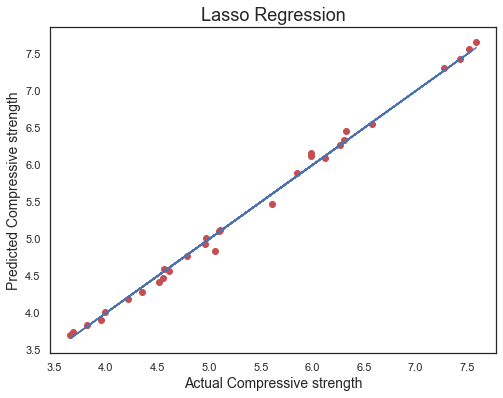

In [55]:
#Plotting for Lasso
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Lasso Regression',fontsize=18)
plt.xlabel('Actual Compressive strength',fontsize=14)
plt.ylabel('Predicted Compressive strength',fontsize=14)
plt.show()

We can see that all the data points are on the best fit line and therefore we can say that this is an excellent dataset as all the datapoints are best fitted here

# Calculating MAE,MSE and RMSE for Lasso

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [57]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))

Mean Absolute Error:  0.05817813810770801
Mean Squared Error:  0.005998305728730539
Root Mean Squared Error:  0.07744872967796528


# Ridge

In [58]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[.0001,.001,.01,.1,1],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.0001}


In [59]:
#Using the best parameters in rd
rd=Ridge(alpha=0.01,copy_X=True,fit_intercept=True,normalize=True,random_state=0,tol=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rds=r2_score(y_test,pred_rd)
print('r2_score: ',rds*100)

rdscore=cross_val_score(rd,x,y,cv=3)
rdc=rdscore.mean()
print('Cross val score: ',rdc*100)

r2_score:  99.57387330037079
Cross val score:  93.69219082945563


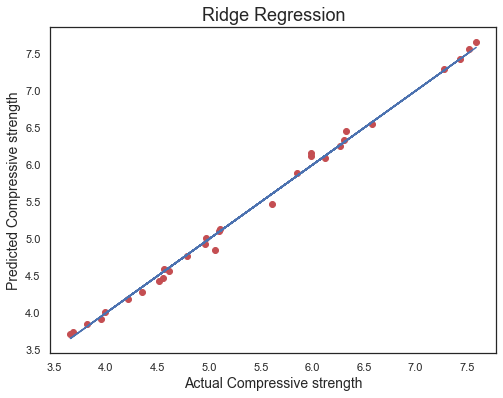

In [60]:
#Plotting for Ridge
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Ridge Regression',fontsize=18)
plt.xlabel('Actual Compressive strength',fontsize=14)
plt.ylabel('Predicted Compressive strength',fontsize=14)
plt.show()

# Calculation MAE,MSE and RMSE for Ridge

In [61]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))

Mean Absolute Error:  0.057372412602740945
Mean Squared Error:  0.005833477628449829
Root Mean Squared Error:  0.07637720621003251


We can see that all the data points are either on the best fit line or near to the best fit line. Therefore, we can say that all the datas are very good in the dataset and they all are bestfitted.

# Conclusion

The given dataset is an excellent dataset for predicting the happiness score value from the given datas and columns. Best performing model is Gradient Boost Regressor Algorithm and nearly all of the data points are bestfitted in both Lasso(L1) and Ridge(L2) Regularization graph.

# Serialization

In [62]:
import joblib
joblib.dump(gbr,'HappinessScoreProject.pkl')

['HappinessScoreProject.pkl']